In [2]:
from sympy import *
init_printing()
x,y=symbols('x,y')
expr1=(x+1)**2
expr1

In [5]:
# Wendland C2 kernel for 3D
ss,sr,dsq,r,c,b,q,H=symbols('ss,sr,dsq,r,c,b,q,H')
p6k,wc2=symbols('p6k,wc2')
dsq=r**2
sr=0.015
ss=0.005
H=sr/ss
q=r/H
b=(1-q/2.0)**4
wc2=b*((2*q) +1)

In [6]:
wc2

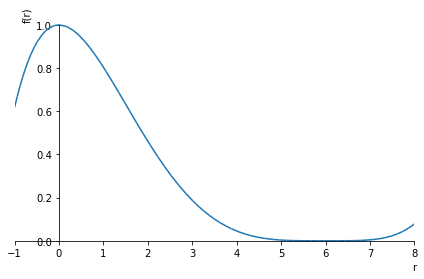

In [7]:
p1 = plot(wc2, (r,-1,8)) 
p1

In [8]:
x,y,z = symbols('x,y,z')
wc2_dr = diff(wc2,r)
solveset(Eq(wc2_dr,0),r)

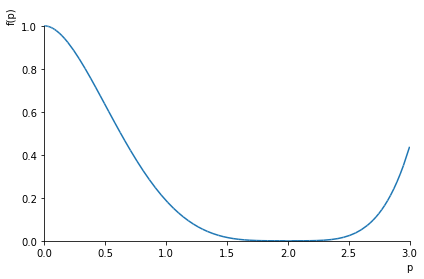

In [9]:
# wc2 kernel, without ss & sr. 
# Basis of wc2 kernel is 2, => need to multiply radius by 2.
p=symbols('p')
wc2q=(1-p/2.0)**4*((2*p) +1)
plot(wc2q,(p,0,3))

In [10]:
q, H

In [11]:
1/integrate(wc2q*(4*pi*p**2),(p,0,2)) # Normalization constant, 1/(radial integral), NB Surface area of a sphere = 4*pi*r**2

In [12]:
r=symbols('r')
integrate((wc2*(4*pi*r**2)),(r,0,6))

In [13]:
N(21/(16*pi))

In [14]:
1/integrate(wc2q*(4*pi*p**2),(p,0,2)) # Normalization constant, 1/(radial integral), NB Surface area of a sphere = 4*pi*r**2

In [15]:
21/16

In [16]:
wc2

In [17]:
sr,ss=symbols('sr,ss')
H=sr/ss
q=r/H
b=(1-q/2.0)**4
wc2=b*((2*q) +1)

In [18]:
wc2

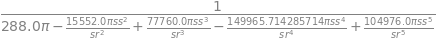

In [19]:
1/integrate((wc2*(4*pi*r**2)),(r,0,6))

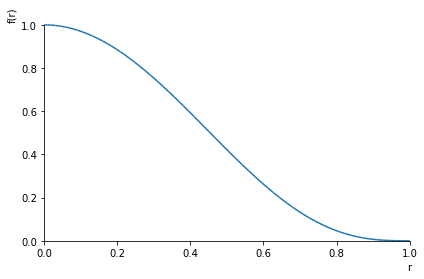

In [20]:
# pk6 : 6th order polynomial from Fluids_v3 & Muleer et al 2003.
ss=1 #0.005
sr=1 #0.015
pk6=((sr**2 - r**2)/ss**2)**3 #pk6 = (1-r**2)**3
plot(pk6,(r,0,1)) #0.02

In [21]:
1/integrate(pk6*4*pi*r**2,(r,0, sr)) # Normalization constant, 1/(radial integral), NB Surface area of a sphere = 4*pi*r**2

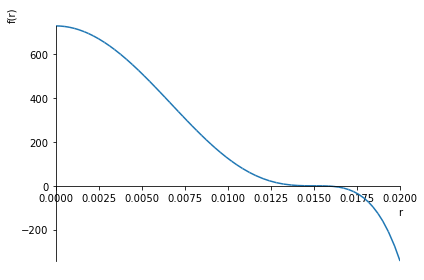

In [22]:
# pk6 with sim_scale ss, and smoothing_radius sr
ss=0.005
sr=0.015
pk6=((sr**2 - r**2)/ss**2)**3
plot(pk6,(r,0,0.02))

In [23]:
sr,ss = symbols('sr,ss')
pk6=((sr**2 - r**2)/ss**2)**3
pk6dr = diff(pk6,r)
solveset(Eq(pk6dr,0), r)

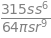

In [24]:
1/integrate(pk6*4*pi*r**2,(r,0, sr)) # Normalization constant, 1/(radial integral), NB Surface area of a sphere = 4*pi*r**2

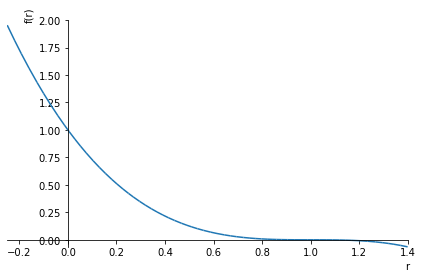

In [25]:
#spikykernel : used for hydrostatic force in Fluids_v3 & Muler et al 2003.
h=1
Wspiky = (h-r)**3 # for 0<= r <= h
plot(Wspiky,(r,-0.25,1.4))

In [26]:
1/integrate(Wspiky*4*pi*r**2, (r,0,1))  # Normalization Constant

In [27]:
# Viscosity kernel : used for viscous force in Fluids_v3 & Muler et al 2003.

# viscosity term = mu * del**2 (v_i-v_j) , where mu = viscosity coefficient, and del**2 is .... ?

# f_i = mu * del**2 (v_i - v_j)(r_a)  = mu SUM_j m_j * (v_j/rho_j) del**2 W(r_i - r_j, h)

# where del**2 W(r_i - r_j, h) is the Laplacian of the smoothing kernel.

# Here Laplacian means the (scalar) divergence of the gradient of the kernel.

# NB it is the Laplacian that is used, and defined to give:

#        W(|r|=h,h) = 0         i.e. kernel is zero at its basis.
#    del W(|r|=h,h) = 0         i.e. gradient of kernel is zero at its basis
# del**2 W(r,h)     = NC*(h-r)  where NC is the normalization constant.

In [28]:
del2Wvisc = 1-r
1/integrate(del2Wvisc*4*pi*r**2, (r,0,1))

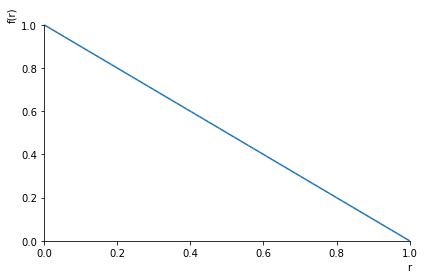

In [29]:
plot((1-r),(r,0,1))

In [30]:
# Wendland C2 as per (Dehnen & Aly 2012)
WC2 = (1-r)**4 *(1+4*r)

In [41]:
diff(WC2, r)

In [31]:
1/integrate(WC2*4*pi*r**2, (r,0,1))  # Normalizattion constant for Wendland kernel in 3D.

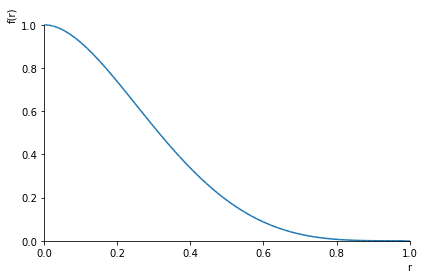

In [32]:
plot(WC2,(r,0,1))

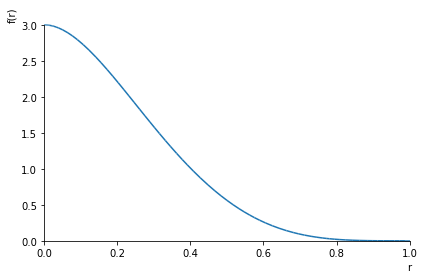

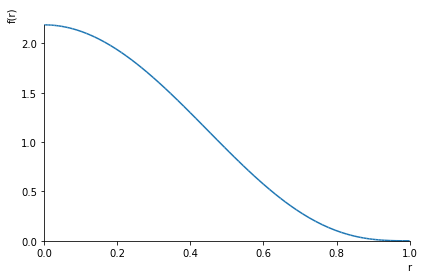

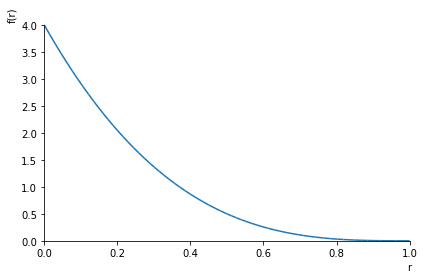

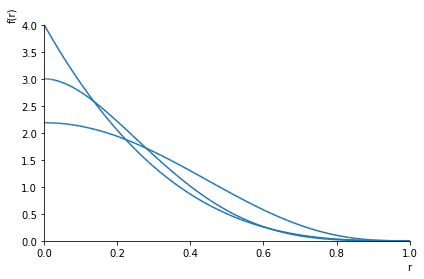

In [43]:
NC_WC2 = 1/integrate(WC2,(r,0,1))                            # Normalizattion constant for Wendland kernel in 3D.
plt1 = plot(NC_WC2*WC2,(r,0,1),label='normalized_Wendland')
ss=1 #0.005
sr=1 #0.015
pk6=((sr**2 - r**2)/ss**2)**3 #pk6 = (1-r**2)**3
NC_pk6 = 1/integrate(pk6,(r,0,1))
plt2 = plot(NC_pk6*pk6,(r,0,1),label='normalized_pk6') #0.02
NC_Wspiky = 1/integrate(Wspiky,(r,0,1))
plt3 = plot(NC_Wspiky*Wspiky,(r,-0,1),label='normalized_Wspiky')
plt1.append(plt2[0])
plt1.append(plt3[0])
plt1.show()

In [50]:
## Note the different shape of the WC2 vs pk6 kernels, after normaization.

In [51]:
### Surface Tension 
# a)- from "SPH & its Diverse Applications" (Monaghan 2012) section 6, Eq 33
# b)- and "Modeling of surface tension and contact angles with SPH" (Tartakovsky et al 2005) Eq 14.

In [66]:
#a)
s, r_vec=symbols('s,r_vec')
F = s * (cos((3*pi*r)/(2*h))) * r_vec/r
F

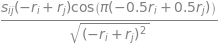

In [67]:
#b)
F_ij, s_ij, r_j, r_i=symbols('F_ij, s_ij, r_j, r_i')

F_ij = s_ij * cos((1.5*pi)*(r_j-r_i)/3*h) * (r_j-r_i)/sqrt((r_j-r_i)**2)

F_ij

In [68]:
## NB the angles in a) and b) are different, 3*Pi/2 vs pi/2, but the cosines are the same.

In [1]:
# In "Modeling of surface tension and contact angles with SPH" (Tartakovsky et al 2005) Eq 14.
# a 3-part cubic spline is used for the smoothing kernel (Eq 8)
# The ....

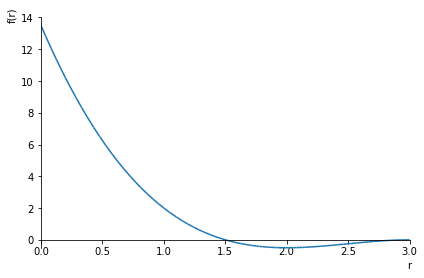

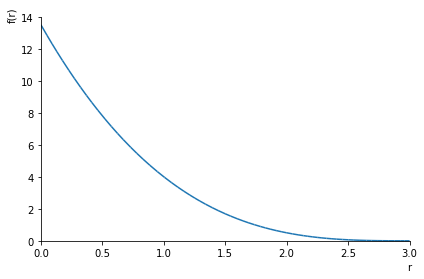

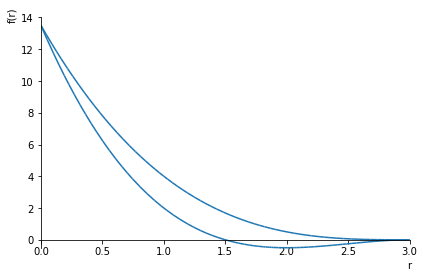

In [74]:
## Test of combined pressure & tension kernel
sr,r = symbols('sr,r')
sr=3
CPkern = (sr - r )**3 - (3/2)*(sr - r )**2
vkern = (1/2)*(sr - r )**3
plt1 = plot(CPkern,(r,0,sr))
plt2 = plot(vkern,(r,0,sr))
plt1.append(plt2[0])
plt1.show()

In [42]:
sr,rootb, d = symbols('sr,rootb,d')
x2 = -(r-sr)*(r-rootb)
x3 = integrate(x2,r) + d
x3

In [43]:
factor(x3)

In [45]:
Eq(x3,0)

In [46]:
solve(Eq(x3,0))

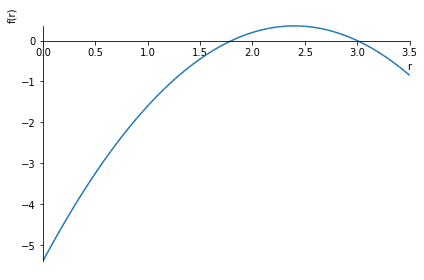

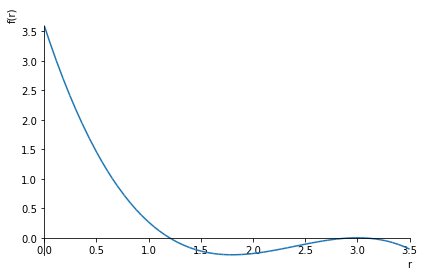

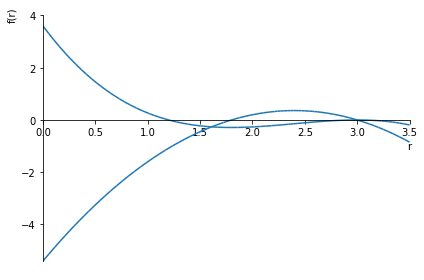

-0.333333333333333*r**3 + 2.4*r**2 - 5.4*r + 3.6


In [44]:
sr=3
rootb=1.8
d=3.6
c=1
x2 = -(r-sr)*(r-rootb)*c
x3 = integrate(x2,r) + d
plt1=plot(x2,(r,0,sr+0.5))
plt2=plot(x3,(r,0,sr+0.5))
plt1.append(plt2[0])
plt1.show()
print(x3)

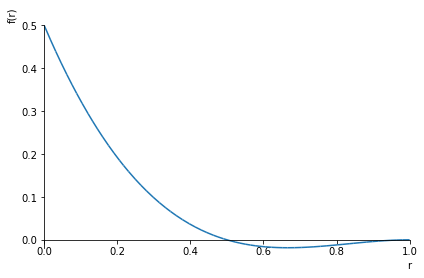

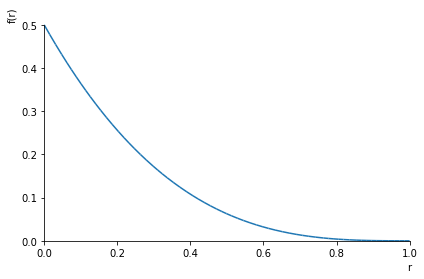

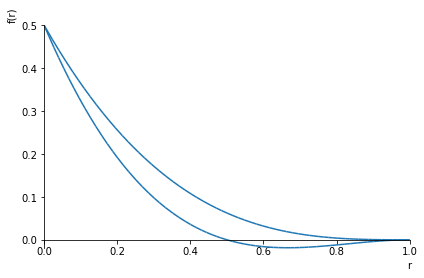

In [85]:
## Test of combined pressure & tension kernel
sr,r = symbols('sr,r')
sr=1
# NB gives equi-pressure radius = 0.5.
CPkern = (sr - r )**3 - (1/2)*(sr - r )**2
vkern = (1/2)*(sr - r )**3
plt1 = plot(CPkern,(r,0,sr))
plt2 = plot(vkern,(r,0,sr))
plt1.append(plt2[0])
plt1.show()

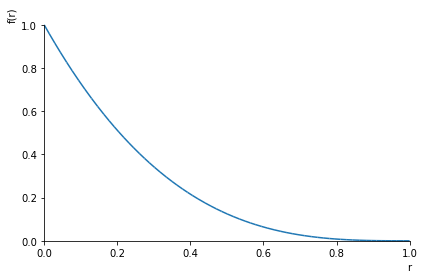

In [86]:
plot((sr - r )**3,(r,0,1))

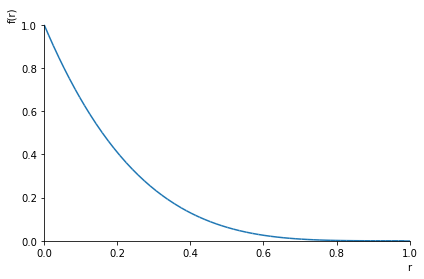

In [102]:
plot((sr - r)**4 ,(r,0,1))